<a href="https://colab.research.google.com/github/Rbca0/Data-Science/blob/main/UNIDADSEIS/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

no. it's only useful in comparison.

**Task2**:

Describe overfitting, in the context of this course

overfitting is concerning oneself too much with fitting the data to the curve. one's model won't be good at predicting other data of a similar type (possibly).

**Task3**:

How do we mitigate overfitting?

use weak priors so one's assumptions (and curve fitting tendancies) are not as strong as the data.


**Task4**:

How do we mitigate underfitting?

Make a deatiled casual diagram and make sure to use enough variables.

**Task5**:

Why would we want more than one predictor in a model?

if multiple factors heavily affect one's estimand, it is helpful to include them both as variables.

**Task6**:

Can we have too many predictors? How would we know?

Yes, an overcomplicated model will have extra variables that aren't significantly improving the elpd_loo, meaning there are unncecesary factors being taken into account. It's easy to overfit the data with too many variables.

**Task7**:

What is variable selection, and how does it work?

Variable selection is making a causal diagram and then making a model based on that. then you must compare it to other model (at least one) using maybe elpd_loo and pick which one you believe in.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

In a model with linear regression adding one categorical variable and one quantitative variable, both variables independently effect the estimand.

In linear regression with a categorical variable being used hirarchicaly and one quantitative, the categorical variable effects both the qantitative variable and the estimand. the quantitative variable also effects the estimand, similar to the first one.

In a Linear regression model with a categorical variable and its interaction with the other variabe, the quantitative variable effects the categorical variable and the estimand, and the categorical variable effects the quantitative variable and the estimand.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

With graphs. no.

We visualize multiple linear regression models by comparing the variables 2 at a time. when there are too many there's no easy way to distinguish them on a 2d graph, so we must split it up raher than visualizing the entire model all at once.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import graphviz as gv
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install bambi
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 15.4 MB/s eta 0:00:00


In [4]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [5]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
#define the model
model_basketball_1 = bmb.Model("FGp ~ FTp + Pos", data=bb)
#fit the model
idata_basketball_1 = model_basketball_1.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model, but as a hierarchy
model_basketball_h1 = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_basketball_h1 = model_basketball_h1.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model
model_basketball_int = bmb.Model("FGp ~ FTp * Pos", data=bb)
#fit the model
idata_basketball_int = model_basketball_int.fit(idata_kwargs={'log_likelihood': True})

In [ ]:
#define the model
model_basketball_int2 = bmb.Model("FGp ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb)
#fit the model
idata_basketball_int2 = model_basketball_int2.fit(idata_kwargs={'log_likelihood': True})
###gemeni fixed 3pa brackets

In [ ]:
#define the model
model_basketball_int3 = bmb.Model("FGp ~ FTp + Pos + `3PA` + Pos:`3PA`", data=bb)
#fit the model
idata_basketball_int3 = model_basketball_int3.fit(idata_kwargs={'log_likelihood': True})
###gemeni fixed 3pa brackets

In [11]:
cmp_df = az.compare(
    {"ft% and pos":idata_basketball_1,"ft% and pos hierarchcal":idata_basketball_h1, "ft% interacting w pos":idata_basketball_int,"all+inter":idata_basketball_int2, "ft% and ppoos and spa and position interacting with 3pa":idata_basketball_int3} )
cmp_df

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
ft% and ppoos and spa and position interacting with 3pa,0,529.912292,12.657691,0.000000,5.967656e-01,15.854782,0.000000,False,log
all+inter,1,528.829016,19.238602,1.083276,4.032344e-01,14.925135,3.743558,False,log
ft% interacting w pos,2,509.132366,13.920733,20.779926,0.000000e+00,16.621704,7.586436,False,log
ft% and pos hierarchcal,3,508.398903,13.764691,21.513389,3.732635e-16,16.989317,7.181026,False,log
ft% and pos,4,507.262172,8.370780,22.650119,9.992007e-16,16.063486,6.831092,False,log


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

both models with all the variables perform the best, with all of them + interaction between 3pa and pos slightly outperforming interactions between all the variables. I think this is because all shots makes a measure on fg% but interactions between all the vvariables don't make sense. ft% and pos, for example, dont affect each other as a good free throw percentage is immportant no matter what possiton you play.



**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [12]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [13]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


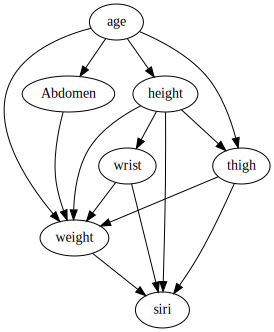

In [26]:
dag_w = gv.Digraph(comment='weight_dag')

dag_w.node('A', 'age')
dag_w.node('S','siri')
dag_w.node('B','Abdomen')
dag_w.node('W','weight')
dag_w.node('H','height')
dag_w.node('R','wrist')
dag_w.node('T','thigh')

dag_w.edges(['WS', 'AB', 'AH', 'AW', 'AT', 'HS', 'HW', 'HR', 'HT', 'TS', 'RS', 'BW', 'RW', 'TW'])

dag_w

I should predict Siri because it only has things affecting it, it doesn't affect anything